In [4]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.model_selection import train_test_split # 数据划分的类
import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures#数据预处理，标准化
from sklearn.pipeline import Pipeline
from sklearn.linear_model.coordinate_descent import ConvergenceWarning

In [5]:
from sklearn.datasets import load_boston 

boston = load_boston()
print(boston.keys())
print(boston.data.shape)
print(boston.feature_names)
boston.data.shape

bos_pd=pd.DataFrame(boston.data)
#bos.colums=boston.feature_names
bos_pd.head(10)

Y=boston.target
y_data=Y.reshape(-1,1)
y_data.shape

x_data=boston.data
x_data.shape

['data', 'feature_names', 'DESCR', 'target']
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


(506, 13)

In [6]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [7]:
# 加载数据
# 
path1='datas/boston_housing1.data'
dataheader=['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptratio','b','lstat','medv']

df = pd.read_csv(path1, sep=';',header=0, names=dataheader, skip_blank_lines=True)#


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 14 columns):
crim       505 non-null float64
zn         505 non-null float64
indus      505 non-null float64
chas       505 non-null int64
nox        505 non-null float64
rm         505 non-null float64
age        505 non-null float64
dis        505 non-null float64
rad        505 non-null int64
tax        505 non-null float64
ptratio    505 non-null float64
b          505 non-null float64
lstat      505 non-null float64
medv       505 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.3 KB


In [22]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000,505.000000
mean,3.620667,11.350495,11.154257,0.069307,0.554728,6.284059,68.581584,3.794459,9.566337,408.459406,18.461782,356.594376,12.668257,22.529901
std,8.608572,23.343704,6.855868,0.254227,0.115990,0.703195,28.176371,2.107757,8.707553,168.629992,2.162520,91.367787,7.139950,9.205991
min,0.009060,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082210,0.000000,5.190000,0.000000,0.449000,5.885000,45.000000,2.100000,4.000000,279.000000,17.400000,375.330000,7.010000,17.000000
50%,0.259150,0.000000,9.690000,0.000000,0.538000,6.208000,77.700000,3.199200,5.000000,330.000000,19.100000,391.430000,11.380000,21.200000
75%,3.678220,12.500000,18.100000,0.000000,0.624000,6.625000,94.100000,5.211900,24.000000,666.000000,20.200000,396.210000,16.960000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [59]:
X_train,X_test,Y_train,Y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler # 数据标准化


ss = StandardScaler() # 模型对象创建
# ss.fit(X_train) # 模型训练
# X_train = xx.transform(X_train) # 对训练集合数据进行转换
X_train = ss.fit_transform(X_train) # 训练模型并转换训练集
X_test = ss.transform(X_test) ## 直接使用在模型构建数据上进行一个数据标准化操作 (测试集)

In [64]:
## 模型训练
lr = LinearRegression(fit_intercept=True) # 模型对象构建
lr.fit(X_train, Y_train) ## 训练模型
## 模型校验
y_predict = lr.predict(X_test) ## 预测结果

print("train on R2:",lr.score(X_train, Y_train))
print("test on R2:",lr.score(X_test, Y_test))
mse = np.average((y_predict-Y_test)**2)
rmse = np.sqrt(mse)
print("rmse:",rmse)

('train on R2:', 0.7729718726571156)
('test on R2:', 0.589201151918644)
('rmse:', 5.78365878728086)


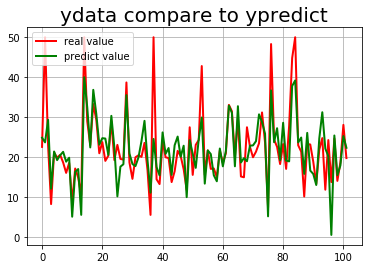

In [68]:
## 预测值和实际值画图比较
t=np.arange(len(X_test))
plt.figure(facecolor='w')#建一个画布，facecolor是背景色
plt.plot(t, Y_test, 'r-', linewidth=2, label='real value')
plt.plot(t, y_predict, 'g-', linewidth=2, label='predict value')
plt.legend(loc = 'upper left')#显示图例，设置图例的位置
plt.title("ydata compare to ypredict", fontsize=20)
plt.grid(b=True)#加网格
plt.show()

In [9]:
'''
使用批量梯度下降算法实现线性回归

therta=therta-1/m*sum(h(x)-y)
therta 是一个列向量
在x 数据上增加一列1.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
gradient
Y-X*therta
'''

lr = 0.0001
lossor=[]
np.random.seed(24)
ther_v=np.random.randn(14)
test_data_Count=100
interator=100000
ther_v.reshape(-1,1)
ther_v

array([ 1.32921217, -0.77003345, -0.31628036, -0.99081039, -1.07081626,
       -1.43871328,  0.56441685,  0.29572189, -1.62640423,  0.2195652 ,
        0.6788048 ,  1.88927273,  0.9615384 ,  0.1040112 ])

In [10]:
train_x=x_data[0:-100]
train_y=y_data[0:-100]
train_x = np.hstack([train_x, np.ones((train_x.shape[0], 1))])

train_y.shape

(406, 1)

In [11]:
train_data_count=train_x.shape[0]
np.dot(train_x,ther_v.T).reshape(-1,1)

array([[ 841.88646067],
       [ 854.77089193],
       [ 831.02226721],
       [ 821.49054631],
       [ 832.65276096],
       [ 830.8045263 ],
       [ 847.9494981 ],
       [ 873.4773067 ],
       [ 867.54699145],
       [ 846.96273258],
       [ 865.36535942],
       [ 860.65335206],
       [ 826.04199601],
       [ 858.45509562],
       [ 841.02629064],
       [ 853.34786577],
       [ 820.0311501 ],
       [ 856.6876736 ],
       [ 644.32821748],
       [ 854.64142784],
       [ 853.90683622],
       [ 871.08661641],
       [ 885.69625453],
       [ 887.22155492],
       [ 879.66618286],
       [ 703.97706815],
       [ 843.25996271],
       [ 711.56765895],
       [ 863.62267275],
       [ 844.244243  ],
       [ 821.9464512 ],
       [ 847.13453392],
       [ 578.94495748],
       [ 815.63613191],
       [ 609.96942464],
       [ 854.04075635],
       [ 815.50943778],
       [ 838.40618199],
       [ 826.71375396],
       [ 759.8902506 ],
       [ 753.62557102],
       [ 782.425

In [12]:
for i in range(interator):
    error_v =train_y-np.dot(train_x,ther_v.T).reshape(-1,1)
    lossor.append(np.dot(error_v.T,error_v)/train_data_count)
    error=np.sum(error_v)/train_data_count
    theta_gredit=error*ther_v.T
    ther_v=ther_v+lr*theta_gredit
    

In [13]:
lossor

[array([[647891.79179973]]),
 array([[545524.60483689]]),
 array([[465963.76286115]]),
 array([[402819.94859141]]),
 array([[351816.17617949]]),
 array([[309995.55518937]]),
 array([[275257.34136848]]),
 array([[246073.76037547]]),
 array([[221310.98353143]]),
 array([[200112.46906557]]),
 array([[181820.91106234]]),
 array([[165924.79320924]]),
 array([[152021.02987239]]),
 array([[139788.36752241]]),
 array([[128968.13144874]]),
 array([[119350.07930945]]),
 array([[110761.8646523]]),
 array([[103061.09113256]]),
 array([[96129.25180129]]),
 array([[89867.05752943]]),
 array([[84190.80113455]]),
 array([[79029.50208473]]),
 array([[74322.64542084]]),
 array([[70018.37726464]]),
 array([[66072.0542188]]),
 array([[62445.06929983]]),
 array([[59103.895605]]),
 array([[56019.3026465]]),
 array([[53165.71053734]]),
 array([[50520.6549331]]),
 array([[48064.34149376]]),
 array([[45779.2731119]]),
 array([[43649.9366073]]),
 array([[41662.5382664]]),
 array([[39804.77969688]]),
 array([[38

In [67]:
"""
x_data shape m,k vactor,m means teast data count, n means feature count
y_data shape m*1
"""
loss=[]

def batch_grident_decent(x_data,y_data,lr=0.000001,interator=1000):
    m,n=x_data.shape
    theta=np.random.randn(n).reshape(-1,1)
    b=0.0
    for i in np.arange(interator):
        y_halt=np.dot(x_data,theta)+b
        theta_gred=np.dot(x_data.T,y_data-y_halt)/m
        b_grad=1/m*(y_data-y_halt).sum()
        theta=theta+lr*theta_gred
        b=b+lr*b_grad
        loss.append(np.dot((y_data-y_halt).T,(y_data-y_halt))/m)
        
    #print np.dot((y_data-y_halt).T,(y_data-y_halt))/m   
    return theta,b

In [68]:
theta,b=batch_grident_decent(train_x,train_y)

In [69]:
loss

[array([[334767.51912022]]),
 array([[178815.92955941]]),
 array([[98628.80529692]]),
 array([[57331.13276345]]),
 array([[35996.64584595]]),
 array([[24911.32178401]]),
 array([[19089.34741595]]),
 array([[15971.67702315]]),
 array([[14244.81105633]]),
 array([[13234.53117812]]),
 array([[12594.73314853]]),
 array([[12147.71945562]]),
 array([[11802.22905948]]),
 array([[11511.36591486]]),
 array([[11251.00564757]]),
 array([[11008.71269767]]),
 array([[10778.05198812]]),
 array([[10555.66934826]]),
 array([[10339.79300864]]),
 array([[10129.46446494]]),
 array([[9924.14369306]]),
 array([[9723.5065014]]),
 array([[9527.34049869]]),
 array([[9335.49167679]]),
 array([[9147.83697251]]),
 array([[8964.27016346]]),
 array([[8784.69460824]]),
 array([[8609.01949993]]),
 array([[8437.15792319]]),
 array([[8269.02583756]]),
 array([[8104.54153649]]),
 array([[7943.62535107]]),
 array([[7786.1994796]]),
 array([[7632.18788233]]),
 array([[7481.51620984]]),
 array([[7334.11174926]]),
 array([